In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

In [1]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/dataset_WWW_22/pruned_cascades_feats_fake_true_minlen5.csv')

Mounted at /content/drive


In [2]:
# df.dtypes
df['ns_label']

0        unreliable
1        unreliable
2        unreliable
3        unreliable
4        conspiracy
            ...    
14639    unreliable
14640    unreliable
14641      reliable
14642    unreliable
14643      reliable
Name: ns_label, Length: 14644, dtype: object

In [3]:
df['text'] = df['text'].convert_dtypes(convert_string=True)
df['ns_label'] = df['ns_label'].convert_dtypes(convert_string=True)

In [4]:
df = df.dropna(axis=0, how ='any',subset=['text', 'ns_label']) 

In [5]:
df['ns_label']

0        unreliable
1        unreliable
2        unreliable
3        unreliable
4        conspiracy
            ...    
14639    unreliable
14640    unreliable
14641      reliable
14642    unreliable
14643      reliable
Name: ns_label, Length: 14644, dtype: string

In [6]:
# Initialize lists
sentences = [] 
labels = []

for item in df['text']:
    sentences.append(item)

for item in df['ns_label']:
    labels.append(item)

In [7]:
sentences[1]

'RT @Lukewearechange: What in the world is happening to this rushed vaccine that the medical world has never seen before?   "4 volunteers de…'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14644 entries, 0 to 14643
Data columns (total 69 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cascade_sno            14644 non-null  int64  
 1   cascade_tid            14644 non-null  int64  
 2   tweetid                14644 non-null  int64  
 3   userid                 14644 non-null  int64  
 4   screen_name            14644 non-null  object 
 5   date                   14644 non-null  object 
 6   lang                   14644 non-null  object 
 7   location               10398 non-null  object 
 8   place_id               52 non-null     object 
 9   place_url              52 non-null     object 
 10  place_type             52 non-null     object 
 11  place_name             52 non-null     object 
 12  place_full_name        52 non-null     object 
 13  place_country_code     52 non-null     object 
 14  place_country          52 non-null     object 
 15  pl

In [9]:
# stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "it", "is", "am", "are", "have", "had", "that", "this", "will"]

In [10]:
import numpy as np
import re

def clean_tweet(tweet):
#     if type(tweet) == np.float:
#         return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
#     temp = re.sub("rt"," ", temp)
#     temp = temp.split()
#     temp = [w for w in temp if not w in stopwords]
#     temp = " ".join(word for word in temp)
    return temp

In [11]:
refined_tweets = []
for tweet in sentences:
    cleaned_tweet = clean_tweet(tweet)
    refined_tweets.append(cleaned_tweet)

refined_tweets

['rt   i wrote an op ed today on the incredible progress we have made to combat covid 19 thanks to operation warp speed  i look ',
 'rt   what in the world is happening to this rushed vaccine that the medical world has never seen before     4 volunteers de ',
 'rt   4 volunteers develop facial paralysis after taking pfizer covid 19 jab  prompting fda to recommend  surveillance for cases   h ',
 'rt   4 volunteers develop facial paralysis after taking pfizer covid 19 shot   ',
 'rt   fda announces 2 deaths of pfizer vaccine trial participants from  serious adverse events   ',
 'rt   dr  peter hotez  the covid vaccine discovery was not a 4 month process  it was a 17 year process ',
 'rt   sudden face paralysis in 4 covid vaccine takers  officials deny it was caused by the vaccine        you are at stage 1  deni ',
 'rt   brandy vaughn  vaccine truth activist and founder of  found dead today  erin elizabeth breaking the ',
 'rt   test patients are dying  warnings going out about not takin

In [12]:
# sentences

In [13]:
trai_labels = []
i = 1
j = 1
for item in labels:
    if item == 'reliable':
        i = i + 1
        trai_labels.append(0)
    elif item == 'conspiracy':
        trai_labels.append(1)
    elif item == 'unreliable':
        j = j + 1
        trai_labels.append(1)
    else:
        trai_labels.append(item)
print("No. of Reliables:", i)
print("No. of UnReliables:", j)

No. of Reliables: 10378
No. of UnReliables: 2621


In [14]:
training_size = int(len(refined_tweets)-(len(refined_tweets)/10))
print(training_size)
# Split the sentences
training_sentences = refined_tweets[0:training_size]
testing_sentences = refined_tweets[training_size:]

# # Split the labels
training_labels = trai_labels[0:training_size]
testing_labels = trai_labels[training_size:]

13179


In [15]:
training_sentences

['rt   i wrote an op ed today on the incredible progress we have made to combat covid 19 thanks to operation warp speed  i look ',
 'rt   what in the world is happening to this rushed vaccine that the medical world has never seen before     4 volunteers de ',
 'rt   4 volunteers develop facial paralysis after taking pfizer covid 19 jab  prompting fda to recommend  surveillance for cases   h ',
 'rt   4 volunteers develop facial paralysis after taking pfizer covid 19 shot   ',
 'rt   fda announces 2 deaths of pfizer vaccine trial participants from  serious adverse events   ',
 'rt   dr  peter hotez  the covid vaccine discovery was not a 4 month process  it was a 17 year process ',
 'rt   sudden face paralysis in 4 covid vaccine takers  officials deny it was caused by the vaccine        you are at stage 1  deni ',
 'rt   brandy vaughn  vaccine truth activist and founder of  found dead today  erin elizabeth breaking the ',
 'rt   test patients are dying  warnings going out about not takin

In [16]:
# For Safety
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# # Parameters
# vocab_size = 50
# max_length = 120
# trunc_type='post'
# oov_tok = "<OOV>"

# # Initialize the Tokenizer class
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# # Generate the word index dictionary for the training sentences
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# # Generate and pad the training sequences
# sequences = tokenizer.texts_to_sequences(training_sentences)
# padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# # Generate and pad the test sequences
# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [53]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [18]:
text = [" Could this be why we are missing so many vaccine doses  Did sell it to the rich  Seems likely. Remember when Trump accused health care workers of stealing PPE How did he even think that Because he would and did"]

In [19]:
import tensorflow_hub as hub
import tensorflow_text as text_tens
import tensorflow as tf

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df.groupby('ns_label').describe()

cascade_sno                                                  \
                 count           mean            std    min        25%   
ns_label                                                                 
conspiracy      1647.0  453407.282939  334719.374035  133.0  148619.00   
reliable       10377.0  599373.316276  307176.964786  147.0  357450.00   
unreliable      2620.0  539775.135115  328987.911899   63.0  227348.25   

                                           cascade_tid                ...  \
                 50%        75%        max       count          mean  ...   
ns_label                                                              ...   
conspiracy  397151.0  746958.50  1540184.0      1647.0  1.348638e+18  ...   
reliable    629642.0  880488.00  2081263.0     10377.0  1.352208e+18  ...   
unreliable  570085.5  833047.25  2081222.0      2620.0  1.350589e+18  ...   

           sent_vader         timestamp                              \
                  75%     max     count          mean           std   
ns_label                                                              
conspiracy     0.0772  0.9337    1647.0  1.610375e+09  2.108952e+06   
reliable       0.3987  0.9902   10377.0  1.611226e+09  1.889624e+06   
unreliable     0.0772  0.9791    2620.0  1.610840e+09  2.017781e+06   

                                                                    \
                     min           25%           50%           75%   
ns_label                                                             
conspiracy  1.607547e+09  1.608363e+09  1.609921e+09  1.612508e+09   
reliable    1.607547e+09  1.609671e+09  1.611586e+09  1.612827e+09   
unreliable  1.607547e+09  1.609041e+09  1.610931e+09  1.612579e+09   

                          
                     max  
ns_label                  
conspiracy  1.614120e+09  
reliable    1.614125e+09  
unreliable  1.614121e+09  

[3 rows x 208 columns]

In [22]:
data = []

for line, label in zip(refined_tweets, trai_labels):
  local_data = []
  local_data.append(line)
  local_data.append(label)

  data.append(local_data)

In [23]:
new_df = pd.DataFrame(data, columns=['tweets', 'labels'])

In [24]:
new_df.head(10)

,tweets,labels
0,rt i wrote an op ed today on the incredible ...,1
1,rt what in the world is happening to this ru...,1
2,rt 4 volunteers develop facial paralysis aft...,1
3,rt 4 volunteers develop facial paralysis aft...,1
4,rt fda announces 2 deaths of pfizer vaccine ...,1
5,rt dr peter hotez the covid vaccine discov...,0
6,rt sudden face paralysis in 4 covid vaccine ...,1
7,rt brandy vaughn vaccine truth activist and...,1
8,rt test patients are dying warnings going o...,1
9,rt gah people with a significant history o...,0


In [25]:
new_df['tweets'] = new_df['tweets'].convert_dtypes(convert_string=True)

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  14644 non-null  string
 1   labels  14644 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 228.9 KB


In [64]:
Xtrain, Xtest = train_test_split(new_df, train_size=0.7, random_state=101)
val_train, Xtest = train_test_split(Xtest, test_size=0.5, random_state=101)

Ytrain = Xtrain["labels"]
Xtrain = Xtrain["tweets"]
Ytest = Xtest["labels"]
Xtest = Xtest["tweets"]
val_test = val_train["labels"]
val_train = val_train['tweets']

# BERT

In [48]:
# Pre-trained BERT
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3") # Pre-proccessed BERT
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4") # Encoder layer of BERT

In [49]:
# Functional based build of BERT
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model_bert = tf.keras.Model(inputs=[text_input], outputs = [l])

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
  ]

model_bert.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [50]:
model_bert.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [58]:
history_bert = model_bert.fit(Xtrain, Ytrain, epochs=10, validation_data=(val_train, val_test))

Epoch 1/10
321/321 [==============================] - 149s 466ms/step - loss: 0.5659 - accuracy: 0.7172 - precision: 0.6010 - recall: 0.1144 - val_loss: 0.6067 - val_accuracy: 0.7032 - val_precision: 0.2000 - val_recall: 0.0015
Epoch 2/10
321/321 [==============================] - 125s 390ms/step - loss: 0.5603 - accuracy: 0.7258 - precision: 0.6569 - recall: 0.1416 - val_loss: 0.6029 - val_accuracy: 0.6768 - val_precision: 0.4544 - val_recall: 0.4684
Epoch 3/10
321/321 [==============================] - 144s 447ms/step - loss: 0.5557 - accuracy: 0.7230 - precision: 0.6097 - recall: 0.1622 - val_loss: 0.5614 - val_accuracy: 0.7274 - val_precision: 0.6068 - val_recall: 0.2188
Epoch 4/10
321/321 [==============================] - 125s 390ms/step - loss: 0.5534 - accuracy: 0.7274 - precision: 0.6272 - recall: 0.1808 - val_loss: 0.5584 - val_accuracy: 0.7287 - val_precision: 0.6480 - val_recall: 0.1787
Epoch 5/10
321/321 [==============================] - 125s 389ms/step - loss: 0.5488 - a

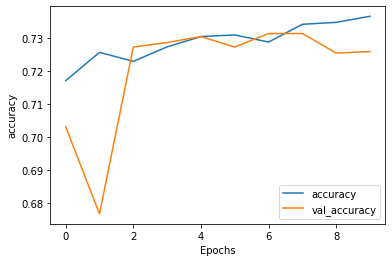

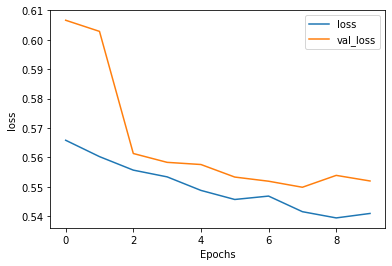

In [99]:
plot_graphs(history_bert, 'accuracy')
plot_graphs(history_bert, 'loss')

In [60]:
model_bert.save("/content/drive/MyDrive/Colab Notebooks/NLP/Model_bert.h5",save_format="h5")

In [61]:
reload_bert = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NLP/Model_bert.h5", custom_objects={'KerasLayer':hub.KerasLayer})

In [65]:
Ypred = reload_bert.predict(Xtest)
Ypred = Ypred.flatten()

69/69 [==============================] - 22s 318ms/step


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [67]:
Ypred = np.round(Ypred)
confus_matrix = confusion_matrix(Ytest, Ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confus_matrix, display_labels = ['Reliable', 'Unreliable'])

In [68]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1594
           1       0.70      0.13      0.23       603

    accuracy                           0.75      2197
   macro avg       0.73      0.56      0.54      2197
weighted avg       0.74      0.75      0.68      2197



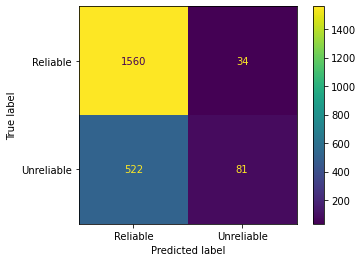

In [69]:
cm_display.plot()

plt.show()

# ALBERT

In [74]:
# Getting The pre-trained model to train it on specific dataset

albert_preprocessor = hub.KerasLayer("http://tfhub.dev/tensorflow/albert_en_preprocess/3")
albert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/albert_en_base/3")


In [75]:
# Building Functional Model

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_albert = albert_preprocessor(text_input)
albert_outputs = albert_encoder(encoder_albert)

pooled_outputs = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(albert_outputs['pooled_output'])

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
  ]

# Use inputs and outputs to construct a final model
model_albert = tf.keras.Model(inputs=[text_input], outputs = pooled_outputs)

model_albert.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)


In [76]:
model_albert.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_6 (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [77]:
history_albert = model_albert.fit(Xtrain, Ytrain, epochs=10, validation_data=(val_train, val_test))

Epoch 1/10
321/321 [==============================] - 155s 451ms/step - loss: 0.5941 - accuracy: 0.7042 - precision: 0.4763 - recall: 0.0567 - val_loss: 0.5784 - val_accuracy: 0.7096 - val_precision: 0.5604 - val_recall: 0.0786
Epoch 2/10
321/321 [==============================] - 145s 452ms/step - loss: 0.5793 - accuracy: 0.7097 - precision: 0.5377 - recall: 0.0922 - val_loss: 0.5738 - val_accuracy: 0.7055 - val_precision: 0.5132 - val_recall: 0.0601
Epoch 3/10
321/321 [==============================] - 145s 451ms/step - loss: 0.5727 - accuracy: 0.7114 - precision: 0.5403 - recall: 0.1267 - val_loss: 0.5731 - val_accuracy: 0.7082 - val_precision: 0.5513 - val_recall: 0.0663
Epoch 4/10
321/321 [==============================] - 144s 449ms/step - loss: 0.5703 - accuracy: 0.7124 - precision: 0.5420 - recall: 0.1433 - val_loss: 0.5945 - val_accuracy: 0.7060 - val_precision: 0.5455 - val_recall: 0.0277
Epoch 5/10
321/321 [==============================] - 144s 450ms/step - loss: 0.5656 - a

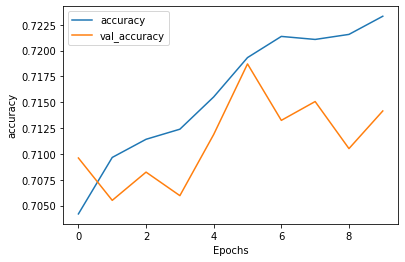

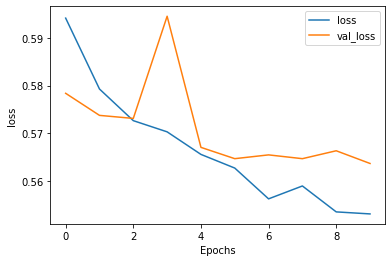

In [78]:
plot_graphs(history_albert, 'accuracy')
plot_graphs(history_albert, 'loss')

In [79]:
model_albert.save("/content/drive/MyDrive/Colab Notebooks/NLP/Model_albert.h5",save_format="h5")

In [80]:
reload_albert = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NLP/Model_albert.h5", custom_objects={'KerasLayer':hub.KerasLayer})

In [89]:
Ypred = reload_albert.predict(Xtest)
Ypred = Ypred.flatten()

69/69 [==============================] - 22s 323ms/step


In [91]:
# Building a Confussion Matric
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Ypred = np.round(Ypred)
confusion_matrix_albert = confusion_matrix(Ytest, Ypred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_albert, display_labels=['Reliable', 'Unreliable'])

In [98]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85      1594
           1       0.68      0.17      0.27       603

    accuracy                           0.75      2197
   macro avg       0.72      0.57      0.56      2197
weighted avg       0.73      0.75      0.69      2197



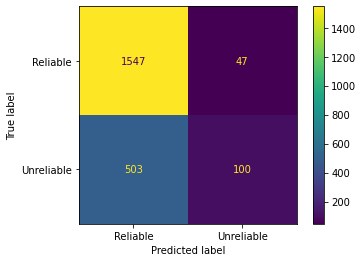

In [101]:
cm_display.plot()
plt.show()